<a href="https://colab.research.google.com/github/csantanaes/analisedadostwitter/blob/main/EARTE_Analise_Twitter_Fev_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#montagem do Drive no Colab 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# IMPORTANDO CSV para Colab 
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/DATA/tweets_EARTE_hydrated.csv')
df.head()
# 

,id,tweet_url,created_at,parsed_created_at,user_screen_name,text,tweet_type,coordinates,hashtags,media,urls,favorite_count,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,retweet_count,retweet_or_quote_id,retweet_or_quote_screen_name,retweet_or_quote_user_id,source,user_id,user_created_at,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified
0,1348123015066775554,https://twitter.com/b2Gr8/status/1348123015066...,Sun Jan 10 04:22:28 +0000 2021,2021-01-10 04:22:28+00:00,b2Gr8,@Tea_earte てぃさんおはようございますっ😆✨,reply,NaN,NaN,NaN,NaN,1,Tea_earte,1.348092e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",1264309021,Wed Mar 13 12:05:21 +0000 2013,False,声真似主さん好き！/サブ(@b_2G_r8),107653,710,488,7,NaN,ビゴリ,118678,NaN,NaN,False
1,1348125535495340033,https://twitter.com/b2Gr8/status/1348125535495...,Sun Jan 10 04:32:29 +0000 2021,2021-01-10 04:32:29+00:00,b2Gr8,@Tea_earte てぃさぁぁあんんんん！！！！！,reply,NaN,NaN,NaN,NaN,1,Tea_earte,1.348124e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",1264309021,Wed Mar 13 12:05:21 +0000 2013,False,声真似主さん好き！/サブ(@b_2G_r8),107653,710,488,7,NaN,ビゴリ,118678,NaN,NaN,False
2,1348145276914200576,https://twitter.com/jktaejoon/status/134814527...,Sun Jan 10 05:50:56 +0000 2021,2021-01-10 05:50:56+00:00,jktaejoon,GENTE TA PARCENDO UMA OBRA D EARTE UMA PINTURA...,original,NaN,NaN,https://pbs.twimg.com/media/ErWS-oBXAAI5bHj.jpg,NaN,0,NaN,NaN,NaN,pt,NaN,False,0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",1295795277958467587,Tue Aug 18 18:50:55 +0000 2020,False,NaN,10924,2019,1992,18,1997,anne,30606,NaN,NaN,False
3,1348184655237844992,https://twitter.com/____stk1022/status/1348184...,Sun Jan 10 08:27:24 +0000 2021,2021-01-10 08:27:24+00:00,____stk1022,@Tea_earte てぃさんが発音よく言ってるのがしっかり脳内で再生できた（笑）,reply,NaN,NaN,NaN,NaN,0,Tea_earte,1.348182e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",3998131632,Sat Oct 24 03:48:13 +0000 2015,False,𝐓𝐞𝐚 𝐭𝐢𝐦𝐞 ∽ 𖠚ᐝ❤︎,35614,85,101,4,𝐋𝐞𝐯𝐢 𝐀𝐜𝐤𝐞𝐫𝐦𝐚𝐧,"サ ツ キ ,",9372,NaN,NaN,False
4,1348187077905563649,https://twitter.com/____stk1022/status/1348187...,Sun Jan 10 08:37:02 +0000 2021,2021-01-10 08:37:02+00:00,____stk1022,@Tea_earte 喜んでもっと喜んで！！！\r\n闘いで負けても発音の良さでは勝てるとい...,reply,NaN,NaN,NaN,NaN,0,Tea_earte,1.348185e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",3998131632,Sat Oct 24 03:48:13 +0000 2015,False,𝐓𝐞𝐚 𝐭𝐢𝐦𝐞 ∽ 𖠚ᐝ❤︎,35614,85,101,4,𝐋𝐞𝐯𝐢 𝐀𝐜𝐤𝐞𝐫𝐦𝐚𝐧,"サ ツ キ ,",9372,NaN,NaN,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            4998 non-null   int64  
 1   tweet_url                     4998 non-null   object 
 2   created_at                    4998 non-null   object 
 3   parsed_created_at             4998 non-null   object 
 4   user_screen_name              4998 non-null   object 
 5   text                          4998 non-null   object 
 6   tweet_type                    4998 non-null   object 
 7   coordinates                   0 non-null      float64
 8   hashtags                      536 non-null    object 
 9   media                         385 non-null    object 
 10  urls                          290 non-null    object 
 11  favorite_count                4998 non-null   int64  
 12  in_reply_to_screen_name       1255 non-null   object 
 13  in_

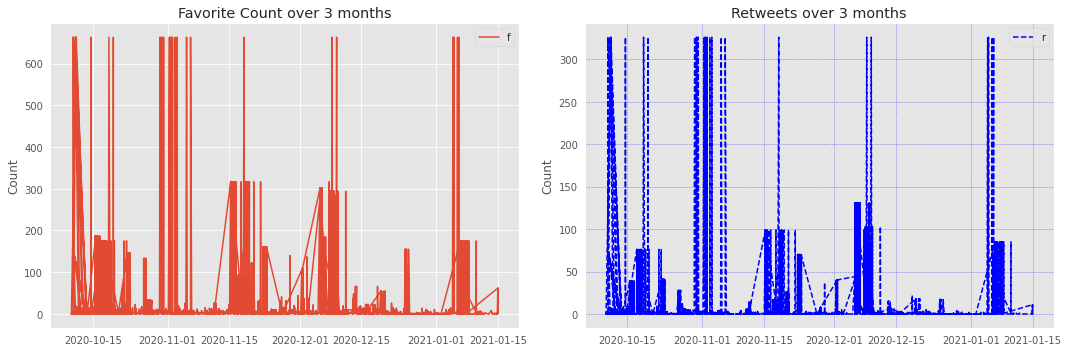

In [ ]:

#Looking at Favorite and Retweet Counts
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

% matplotlib inline
plt.style.use('ggplot')
df_stacked = df.loc[:,('favorite_count','retweet_count')]
fig, axes = plt.subplots(1, 2, figsize=(15,5))
num_days = (max(df['created_at']) - min(df['created_at'])).days
num_months = int(num_days/30)

# default grid appearance
axes[0].plot(df['created_at'],df['favorite_count'],label='favorite count')
axes[1].plot(df['created_at'],df['retweet_count'],label='retweet count',ls="--",color='b')

axes[0].set_title(('Favorite Count over ' + str(num_months) + ' months'))
axes[1].set_title(('Retweets over ' + str(num_months) + ' months'))

axes[0].grid(True)
axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

axes[0].yaxis.set_label_text('Count')
axes[1].yaxis.set_label_text('Count')
axes[0].legend('favorites')
axes[1].legend('retweets')
plt.tight_layout()





In [ ]:
#Favoritos top 10 tweets
top_ten_tweets = df['favorite_count'].sort_values(ascending=False).head(10) # returns a df with first column = index, second column = tweet

print(id + "'s top 5 tweets (using favorite count)" + "\n")
for i in range(5):
    index = top_ten_tweets.index[i]
    print(str(i+1) + ")" + df.iloc[index]['text'])
    print("Favorite count: " + str(df.iloc[index]['favorite_count']) + "\n")

# retomar: https://4bic.github.io/2018-07-21-healthX_twitter_analysis/
#https://benalexkeen.com/resampling-time-series-data-with-pandas/
#https://medium.com/dataexplorations/thoughts-on-visionzero-first-steps-with-the-twitter-api-and-word2vec-for-text-analysis-e766ed6b55ab
#https://github.com/sergiers3/Mariano-Rajoy-Twitter-analysis-tutorial
#http://jurgens.people.si.umich.edu/tutorials/Mapping_Word_Frequencies_on_Twitter_using_Python.html


TypeError: ignored

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12498 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12490 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12467 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12499 missing from current font.
  font.set_text(s, 0.0, flags=fl

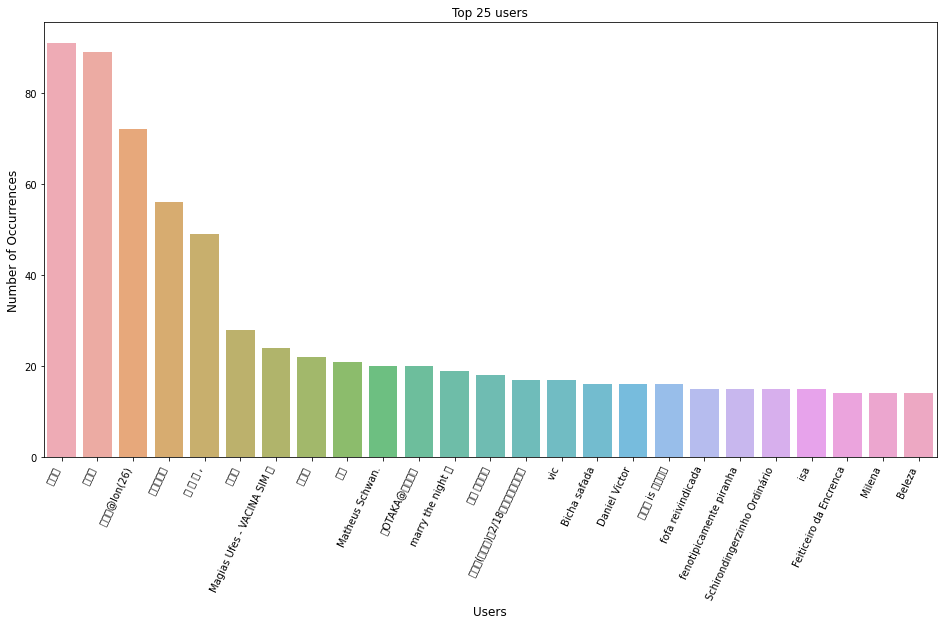

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
users_count  = df['user_name'].value_counts()
users_count = users_count[:25,]
plt.figure(figsize=(16,8))
sns.barplot(users_count.index, users_count.values, alpha=0.8)
plt.title('Top 25 users')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Users', fontsize=12)
plt.xticks(rotation=65, horizontalalignment='right')
plt.show()

#https://github.com/dariaminsky/belarusian-twitter/blob/master/EDA.ipynb

In [ ]:
#Contagem do Tuites mais antigo ao mais novo
print("Data twitter mais antigo:  ",df.created_at.min())
print("-----")
print("Data twitter mais novo  :  ",df.created_at.max())

#reactions = df.groupby(['created_at']).count()
#ax = reactions.replies.plot(figsize=(15,6),ls='--',c='red')
#ax.xaxis.grid(True)
#ax.yaxis.grid(True)

Data twitter mais antigo:   2020-10-10 03:35:57+00:00
-----
Data twitter mais novo  :   2021-01-14 23:55:49+00:00


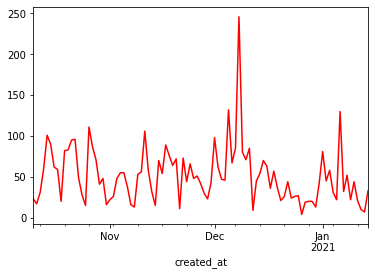

In [ ]:
# Gráfico de volume de postages
# Convert the created_at column to np.datetime object
df['created_at'] = pd.to_datetime(df['created_at'])

df.set_index('created_at').resample('D').text.count().plot(color='r')


#Analisar os dados.. Tentar fazer script para contar twuites agregados de um mes

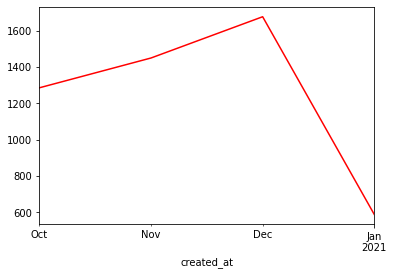

In [ ]:
df.set_index('created_at').resample('M').text.count().plot(color='r')

In [ ]:
#ANALISE ORIGEM POST

df['source'].head()
# first extracting the client name including the >< characters
for source in df['source']:
    df['source'] = df['source'].str.extract('(\>.*\<)', expand=False) #output example: '>Twitter for Android<'
    
# after that extracting only the letters
for source in df['source']:
    df['source'] = df['source'].str.extract('([a-zA-Z ]+)', expand=False) #output example: 'Twitter for Android'

# get the value counts for source column
df['source'].value_counts()



Twitter for Android    2539
Twitter for iPhone     1494
Twitter Web App         924
TweetDeck                10
Twitter for iPad          9
Arrow                     4
Cheap Bots                4
twitcle plus              2
Guud Campaigns            2
AssistirBot               2
Echofon                   1
CapivarBot                1
Instagram                 1
leo                       1
Bot corno                 1
Poop retweet v            1
QuarentenaBot             1
Name: source, dtype: int64

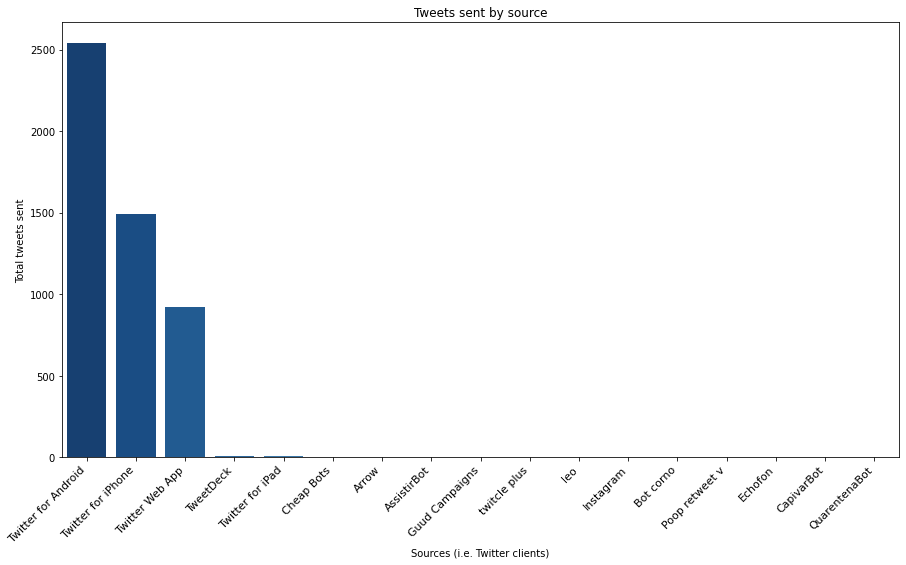

In [ ]:
# get the value counts for source column
import seaborn as sns
df['source'].value_counts()

# plot the above data
# set the figure size
plt.figure(figsize=(15,8))

# create a countplot, ordered by count
sns.countplot(x='source', data=df, palette = 'Blues_r' , order = df['source'].value_counts().index)

# rotate the ticks for better readability
plt.xticks(rotation=45, fontsize='11', horizontalalignment='right')

# set the labels and title
plt.xlabel('Sources (i.e. Twitter clients)')
plt.ylabel('Total tweets sent')
plt.title('Tweets sent by source');

In [ ]:
print(df['source'])

0        Twitter for iPhone
1        Twitter for iPhone
2       Twitter for Android
3        Twitter for iPhone
4        Twitter for iPhone
               ...         
4993    Twitter for Android
4994     Twitter for iPhone
4995    Twitter for Android
4996     Twitter for iPhone
4997    Twitter for Android
Name: source, Length: 4998, dtype: object


In [ ]:
#contar quantidade de informações do Dataframe
df.count()

# Total tweets
print ('Total tweets this period:', len(df.index), '\n')

df.head(10)


Total tweets this period: 4998 



,id,tweet_url,created_at,parsed_created_at,user_screen_name,text,tweet_type,coordinates,hashtags,media,urls,favorite_count,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,retweet_count,retweet_or_quote_id,retweet_or_quote_screen_name,retweet_or_quote_user_id,source,user_id,user_created_at,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified
0,1348123015066775554,https://twitter.com/b2Gr8/status/1348123015066...,Sun Jan 10 04:22:28 +0000 2021,2021-01-10 04:22:28+00:00,b2Gr8,@Tea_earte てぃさんおはようございますっ😆✨,reply,NaN,NaN,NaN,NaN,1,Tea_earte,1.348092e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,Twitter for iPhone,1264309021,Wed Mar 13 12:05:21 +0000 2013,False,声真似主さん好き！/サブ(@b_2G_r8),107653,710,488,7,NaN,ビゴリ,118678,NaN,NaN,False
1,1348125535495340033,https://twitter.com/b2Gr8/status/1348125535495...,Sun Jan 10 04:32:29 +0000 2021,2021-01-10 04:32:29+00:00,b2Gr8,@Tea_earte てぃさぁぁあんんんん！！！！！,reply,NaN,NaN,NaN,NaN,1,Tea_earte,1.348124e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,Twitter for iPhone,1264309021,Wed Mar 13 12:05:21 +0000 2013,False,声真似主さん好き！/サブ(@b_2G_r8),107653,710,488,7,NaN,ビゴリ,118678,NaN,NaN,False
2,1348145276914200576,https://twitter.com/jktaejoon/status/134814527...,Sun Jan 10 05:50:56 +0000 2021,2021-01-10 05:50:56+00:00,jktaejoon,GENTE TA PARCENDO UMA OBRA D EARTE UMA PINTURA...,original,NaN,NaN,https://pbs.twimg.com/media/ErWS-oBXAAI5bHj.jpg,NaN,0,NaN,NaN,NaN,pt,NaN,False,0,NaN,NaN,NaN,Twitter for Android,1295795277958467587,Tue Aug 18 18:50:55 +0000 2020,False,NaN,10924,2019,1992,18,1997,anne,30606,NaN,NaN,False
3,1348184655237844992,https://twitter.com/____stk1022/status/1348184...,Sun Jan 10 08:27:24 +0000 2021,2021-01-10 08:27:24+00:00,____stk1022,@Tea_earte てぃさんが発音よく言ってるのがしっかり脳内で再生できた（笑）,reply,NaN,NaN,NaN,NaN,0,Tea_earte,1.348182e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,Twitter for iPhone,3998131632,Sat Oct 24 03:48:13 +0000 2015,False,𝐓𝐞𝐚 𝐭𝐢𝐦𝐞 ∽ 𖠚ᐝ❤︎,35614,85,101,4,𝐋𝐞𝐯𝐢 𝐀𝐜𝐤𝐞𝐫𝐦𝐚𝐧,"サ ツ キ ,",9372,NaN,NaN,False
4,1348187077905563649,https://twitter.com/____stk1022/status/1348187...,Sun Jan 10 08:37:02 +0000 2021,2021-01-10 08:37:02+00:00,____stk1022,@Tea_earte 喜んでもっと喜んで！！！\r\n闘いで負けても発音の良さでは勝てるとい...,reply,NaN,NaN,NaN,NaN,0,Tea_earte,1.348185e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,Twitter for iPhone,3998131632,Sat Oct 24 03:48:13 +0000 2015,False,𝐓𝐞𝐚 𝐭𝐢𝐦𝐞 ∽ 𖠚ᐝ❤︎,35614,85,101,4,𝐋𝐞𝐯𝐢 𝐀𝐜𝐤𝐞𝐫𝐦𝐚𝐧,"サ ツ キ ,",9372,NaN,NaN,False
5,1348201254250373120,https://twitter.com/OTAKA96438403/status/13482...,Sun Jan 10 09:33:22 +0000 2021,2021-01-10 09:33:22+00:00,OTAKA96438403,@Tea_earte バサッッ🦅,reply,NaN,NaN,NaN,NaN,0,Tea_earte,1.348200e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,Twitter for iPhone,1300999909345079296,Wed Sep 02 03:32:40 +0000 2020,False,競馬 /タウロス専門絵師/👺/🫐,637,38,83,0,NaN,🫐OTAKA@中山男🫐,1366,NaN,NaN,False
6,1348203661545988096,https://twitter.com/OTAKA96438403/status/13482...,Sun Jan 10 09:42:55 +0000 2021,2021-01-10 09:42:55+00:00,OTAKA96438403,@Tea_earte ティコロス...タベル🦅,reply,NaN,NaN,NaN,NaN,1,Tea_earte,1.348201e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,Twitter for iPhone,1300999909345079296,Wed Sep 02 03:32:40 +0000 2020,False,競馬 /タウロス専門絵師/👺/🫐,637,38,83,0,NaN,🫐OTAKA@中山男🫐,1366,NaN,NaN,False
7,1348210283433447424,https://twitter.com/____stk1022/status/1348210...,Sun Jan 10 10:09:14 +0000 2021,2021-01-10 10:09:14+00:00,____stk1022,@Tea_earte @arashi_0804_ で、出たあ、よく分からんマウント、、！\r...,reply,NaN,NaN,NaN,NaN,1,Tea_earte,1.348209e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,Twitter for iPhone,3998131632,Sat Oct 24 03:48:13 +0000 2015,False,𝐓𝐞𝐚 𝐭𝐢𝐦𝐞 ∽ 𖠚ᐝ❤︎,35614,85,101,4,𝐋𝐞𝐯𝐢 𝐀𝐜𝐤𝐞𝐫𝐦𝐚𝐧,"サ ツ キ ,",9372,NaN,NaN,False
8,1348210976194064385,https://twitter.com/arashi_091510/status/13482...,Sun Jan 10 10:11:59 +0000 2021,2021-01-10 10:11:59+00:00,arashi_091510,@Tea_earte @TallyHo_o 2人ともイケボすぎて一瞬わかんなくなっただけだよ...,reply,NaN,NaN,NaN,NaN,2,Tea_earte,1.348211e+18

# Twitter Data Analysis - Sentiment Analysis

In [ ]:
df.head()

,id,tweet_url,created_at,parsed_created_at,user_screen_name,text,tweet_type,coordinates,hashtags,media,urls,favorite_count,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,retweet_count,retweet_or_quote_id,retweet_or_quote_screen_name,retweet_or_quote_user_id,source,user_id,user_created_at,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified
0,1348123015066775554,https://twitter.com/b2Gr8/status/1348123015066...,Sun Jan 10 04:22:28 +0000 2021,2021-01-10 04:22:28+00:00,b2Gr8,@Tea_earte てぃさんおはようございますっ😆✨,reply,NaN,NaN,NaN,NaN,1,Tea_earte,1.348092e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,Twitter for iPhone,1264309021,Wed Mar 13 12:05:21 +0000 2013,False,声真似主さん好き！/サブ(@b_2G_r8),107653,710,488,7,NaN,ビゴリ,118678,NaN,NaN,False
1,1348125535495340033,https://twitter.com/b2Gr8/status/1348125535495...,Sun Jan 10 04:32:29 +0000 2021,2021-01-10 04:32:29+00:00,b2Gr8,@Tea_earte てぃさぁぁあんんんん！！！！！,reply,NaN,NaN,NaN,NaN,1,Tea_earte,1.348124e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,Twitter for iPhone,1264309021,Wed Mar 13 12:05:21 +0000 2013,False,声真似主さん好き！/サブ(@b_2G_r8),107653,710,488,7,NaN,ビゴリ,118678,NaN,NaN,False
2,1348145276914200576,https://twitter.com/jktaejoon/status/134814527...,Sun Jan 10 05:50:56 +0000 2021,2021-01-10 05:50:56+00:00,jktaejoon,GENTE TA PARCENDO UMA OBRA D EARTE UMA PINTURA...,original,NaN,NaN,https://pbs.twimg.com/media/ErWS-oBXAAI5bHj.jpg,NaN,0,NaN,NaN,NaN,pt,NaN,False,0,NaN,NaN,NaN,Twitter for Android,1295795277958467587,Tue Aug 18 18:50:55 +0000 2020,False,NaN,10924,2019,1992,18,1997,anne,30606,NaN,NaN,False
3,1348184655237844992,https://twitter.com/____stk1022/status/1348184...,Sun Jan 10 08:27:24 +0000 2021,2021-01-10 08:27:24+00:00,____stk1022,@Tea_earte てぃさんが発音よく言ってるのがしっかり脳内で再生できた（笑）,reply,NaN,NaN,NaN,NaN,0,Tea_earte,1.348182e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,Twitter for iPhone,3998131632,Sat Oct 24 03:48:13 +0000 2015,False,𝐓𝐞𝐚 𝐭𝐢𝐦𝐞 ∽ 𖠚ᐝ❤︎,35614,85,101,4,𝐋𝐞𝐯𝐢 𝐀𝐜𝐤𝐞𝐫𝐦𝐚𝐧,"サ ツ キ ,",9372,NaN,NaN,False
4,1348187077905563649,https://twitter.com/____stk1022/status/1348187...,Sun Jan 10 08:37:02 +0000 2021,2021-01-10 08:37:02+00:00,____stk1022,@Tea_earte 喜んでもっと喜んで！！！\r\n闘いで負けても発音の良さでは勝てるとい...,reply,NaN,NaN,NaN,NaN,0,Tea_earte,1.348185e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,Twitter for iPhone,3998131632,Sat Oct 24 03:48:13 +0000 2015,False,𝐓𝐞𝐚 𝐭𝐢𝐦𝐞 ∽ 𖠚ᐝ❤︎,35614,85,101,4,𝐋𝐞𝐯𝐢 𝐀𝐜𝐤𝐞𝐫𝐦𝐚𝐧,"サ ツ キ ,",9372,NaN,NaN,False


In [ ]:

# Cleaning the text by removing hastags, @'s, URL's.
def CleanTxt(text):
  text = re.sub(r"@(\w+)", ' ', text) # This wil remove any @ mentions
  text = re.sub('@[^\s]+','',text) # This will remove any hashtags (#)
  text = re.sub('https?:\/\/\S+', '', text) # This will remove any URl's
  text = re.sub('RT[\s]+', '', text) # This will remove any RT mentions

  return text

# Cleaning the text
df['text'] = df['text'].apply(CleanTxt)

# Showing the cleaned text
df





#https://medium.com/better-programming/twitter-sentiment-analysis-15d8892c0082
#https://dev.to/nicfoxds/how-to-analyse-clean-text-data-in-python-2hb9
#https://twitter-data-analysis.blogspot.com/2020/08/twitter-data-analysis-part-3-sentiment.html

NameError: ignored

In [ ]:
# Print the columns of the dataframe
print(df.columns)

Index(['id', 'tweet_url', 'created_at', 'parsed_created_at',
       'user_screen_name', 'text', 'tweet_type', 'coordinates', 'hashtags',
       'media', 'urls', 'favorite_count', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_user_id', 'lang', 'place',
       'possibly_sensitive', 'retweet_count', 'retweet_or_quote_id',
       'retweet_or_quote_screen_name', 'retweet_or_quote_user_id', 'source',
       'user_id', 'user_created_at', 'user_default_profile_image',
       'user_description', 'user_favourites_count', 'user_followers_count',
       'user_friends_count', 'user_listed_count', 'user_location', 'user_name',
       'user_statuses_count', 'user_time_zone', 'user_urls', 'user_verified'],
      dtype='object')


In [ ]:
# Get all names 
for col_name in df.columns: 
    print(col_name)

id
tweet_url
created_at
parsed_created_at
user_screen_name
text
tweet_type
coordinates
hashtags
media
urls
favorite_count
in_reply_to_screen_name
in_reply_to_status_id
in_reply_to_user_id
lang
place
possibly_sensitive
retweet_count
retweet_or_quote_id
retweet_or_quote_screen_name
retweet_or_quote_user_id
source
user_id
user_created_at
user_default_profile_image
user_description
user_favourites_count
user_followers_count
user_friends_count
user_listed_count
user_location
user_name
user_statuses_count
user_time_zone
user_urls
user_verified


In [ ]:
df.values.tolist()

In [ ]:
print(df['text']) # imprimir somente uma coluna do dataframe

0                             @Tea_earte てぃさんおはようございますっ😆✨
1                              @Tea_earte てぃさぁぁあんんんん！！！！！
2       GENTE TA PARCENDO UMA OBRA D EARTE UMA PINTURA...
3               @Tea_earte てぃさんが発音よく言ってるのがしっかり脳内で再生できた（笑）
4       @Tea_earte 喜んでもっと喜んで！！！\r\n闘いで負けても発音の良さでは勝てるとい...
                              ...                        
4993         Eu no EARTE kkkkkkkk https://t.co/X9wxuyI8dh
4994        earte me fazendo passar raiva em pleno sábado
4995    @Lugusfe SIM! as atividades do earte que aguar...
4996       em completo desespero e desânimo com com earte
4997    eu simplesmente estou ignorando tudo relaciona...
Name: text, Length: 4998, dtype: object


In [ ]:
df[['id','created_at','text']]

,id,created_at,text
0,1348123015066775554,Sun Jan 10 04:22:28 +0000 2021,@Tea_earte てぃさんおはようございますっ😆✨
1,1348125535495340033,Sun Jan 10 04:32:29 +0000 2021,@Tea_earte てぃさぁぁあんんんん！！！！！
2,1348145276914200576,Sun Jan 10 05:50:56 +0000 2021,GENTE TA PARCENDO UMA OBRA D EARTE UMA PINTURA...
3,1348184655237844992,Sun Jan 10 08:27:24 +0000 2021,@Tea_earte てぃさんが発音よく言ってるのがしっかり脳内で再生できた（笑）
4,1348187077905563649,Sun Jan 10 08:37:02 +0000 2021,@Tea_earte 喜んでもっと喜んで！！！\r\n闘いで負けても発音の良さでは勝てるとい...
...,...,...,...
4993,1315506913627561985,Mon Oct 12 04:17:43 +0000 2020,Eu no EARTE kkkkkkkk https://t.co/X9wxuyI8dh
4994,1315074239360389121,Sat Oct 10 23:38:26 +0000 2020,earte me fazendo passar raiva em pleno sábado
4995,1314955335296221184,Sat Oct 10 15:45:57 +0000 2020,@Lugusfe SIM! as atividades do earte que aguar...
4996,1316051961146478592,Tue Oct 13 16:23:33 +0000 2020,em completo desespero e desânimo com com earte


Data twitter mais antigo:   2020-10-10 03:35:57+00:00
-----
Data twitter mais novo  :   2021-01-14 23:55:49+00:00


In [ ]:

#Lets take a look at the users who are posting these tweets:
print("There are {} different users".format(df['user_name'].nunique()))

#https://towardsdatascience.com/visualisation-of-information-from-raw-twitter-data-part-2-11707a65e920

There are 1834 different users


In [ ]:


#Plot these results
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize = (15,15))
index = np.arange(25)
plt.bar(index, dict_values, edgecolor = 'black', linewidth=1)
plt.xlabel('Most active Users', fontsize = 18)
plt.ylabel('Nº of Tweets', fontsize=20)
plt.xticks(index,dict_keys, fontsize=15, rotation=90)
plt.title('Number of tweets for the most active users', fontsize = 20)
plt.savefig('Tweets_of_active_users.jpg')
plt.show()
#com erro 
#https://towardsdatascience.com/visualisation-of-information-from-raw-twitter-data-part-2-11707a65e920

In [ ]:
df1 = pd.DataFrame(df)
df['created_at'] = pd.to_datetime(df['created_at']) # convert to datetime data type
df.sort_values(by='created_at');
df1.created_at



0      2021-01-10 04:22:28+00:00
1      2021-01-10 04:32:29+00:00
2      2021-01-10 05:50:56+00:00
3      2021-01-10 08:27:24+00:00
4      2021-01-10 08:37:02+00:00
                  ...           
4993   2020-10-12 04:17:43+00:00
4994   2020-10-10 23:38:26+00:00
4995   2020-10-10 15:45:57+00:00
4996   2020-10-13 16:23:33+00:00
4997   2020-10-13 00:30:49+00:00
Name: created_at, Length: 4998, dtype: datetime64[ns, UTC]

,id,tweet_url,created_at,parsed_created_at,user_screen_name,text,tweet_type,coordinates,hashtags,media,urls,favorite_count,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,retweet_count,retweet_or_quote_id,retweet_or_quote_screen_name,retweet_or_quote_user_id,source,user_id,user_created_at,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified
0,1348123015066775554,https://twitter.com/b2Gr8/status/1348123015066...,Sun Jan 10 04:22:28 +0000 2021,2021-01-10 04:22:28+00:00,b2Gr8,@Tea_earte てぃさんおはようございますっ😆✨,reply,NaN,NaN,NaN,NaN,1,Tea_earte,1.348092e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",1264309021,Wed Mar 13 12:05:21 +0000 2013,False,声真似主さん好き！/サブ(@b_2G_r8),107653,710,488,7,NaN,ビゴリ,118678,NaN,NaN,False
1,1348125535495340033,https://twitter.com/b2Gr8/status/1348125535495...,Sun Jan 10 04:32:29 +0000 2021,2021-01-10 04:32:29+00:00,b2Gr8,@Tea_earte てぃさぁぁあんんんん！！！！！,reply,NaN,NaN,NaN,NaN,1,Tea_earte,1.348124e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",1264309021,Wed Mar 13 12:05:21 +0000 2013,False,声真似主さん好き！/サブ(@b_2G_r8),107653,710,488,7,NaN,ビゴリ,118678,NaN,NaN,False
2,1348145276914200576,https://twitter.com/jktaejoon/status/134814527...,Sun Jan 10 05:50:56 +0000 2021,2021-01-10 05:50:56+00:00,jktaejoon,GENTE TA PARCENDO UMA OBRA D EARTE UMA PINTURA...,original,NaN,NaN,https://pbs.twimg.com/media/ErWS-oBXAAI5bHj.jpg,NaN,0,NaN,NaN,NaN,pt,NaN,False,0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",1295795277958467587,Tue Aug 18 18:50:55 +0000 2020,False,NaN,10924,2019,1992,18,1997,anne,30606,NaN,NaN,False
3,1348184655237844992,https://twitter.com/____stk1022/status/1348184...,Sun Jan 10 08:27:24 +0000 2021,2021-01-10 08:27:24+00:00,____stk1022,@Tea_earte てぃさんが発音よく言ってるのがしっかり脳内で再生できた（笑）,reply,NaN,NaN,NaN,NaN,0,Tea_earte,1.348182e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",3998131632,Sat Oct 24 03:48:13 +0000 2015,False,𝐓𝐞𝐚 𝐭𝐢𝐦𝐞 ∽ 𖠚ᐝ❤︎,35614,85,101,4,𝐋𝐞𝐯𝐢 𝐀𝐜𝐤𝐞𝐫𝐦𝐚𝐧,"サ ツ キ ,",9372,NaN,NaN,False
4,1348187077905563649,https://twitter.com/____stk1022/status/1348187...,Sun Jan 10 08:37:02 +0000 2021,2021-01-10 08:37:02+00:00,____stk1022,@Tea_earte 喜んでもっと喜んで！！！\r\n闘いで負けても発音の良さでは勝てるとい...,reply,NaN,NaN,NaN,NaN,0,Tea_earte,1.348185e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",3998131632,Sat Oct 24 03:48:13 +0000 2015,False,𝐓𝐞𝐚 𝐭𝐢𝐦𝐞 ∽ 𖠚ᐝ❤︎,35614,85,101,4,𝐋𝐞𝐯𝐢 𝐀𝐜𝐤𝐞𝐫𝐦𝐚𝐧,"サ ツ キ ,",9372,NaN,NaN,False


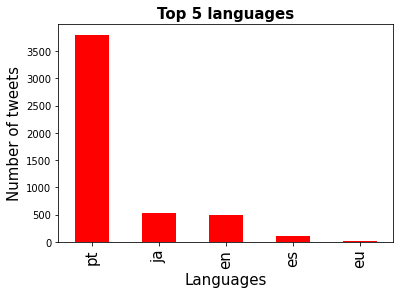

In [ ]:
#top languages

tweets_by_lang = df['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')



In [ ]:
df.head() 

,id,tweet_url,created_at,parsed_created_at,user_screen_name,text,tweet_type,coordinates,hashtags,media,urls,favorite_count,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,retweet_count,retweet_or_quote_id,retweet_or_quote_screen_name,retweet_or_quote_user_id,source,user_id,user_created_at,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified
0,1348123015066775554,https://twitter.com/b2Gr8/status/1348123015066...,Sun Jan 10 04:22:28 +0000 2021,2021-01-10 04:22:28+00:00,b2Gr8,@Tea_earte てぃさんおはようございますっ😆✨,reply,NaN,NaN,NaN,NaN,1,Tea_earte,1.348092e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",1264309021,Wed Mar 13 12:05:21 +0000 2013,False,声真似主さん好き！/サブ(@b_2G_r8),107653,710,488,7,NaN,ビゴリ,118678,NaN,NaN,False
1,1348125535495340033,https://twitter.com/b2Gr8/status/1348125535495...,Sun Jan 10 04:32:29 +0000 2021,2021-01-10 04:32:29+00:00,b2Gr8,@Tea_earte てぃさぁぁあんんんん！！！！！,reply,NaN,NaN,NaN,NaN,1,Tea_earte,1.348124e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",1264309021,Wed Mar 13 12:05:21 +0000 2013,False,声真似主さん好き！/サブ(@b_2G_r8),107653,710,488,7,NaN,ビゴリ,118678,NaN,NaN,False
2,1348145276914200576,https://twitter.com/jktaejoon/status/134814527...,Sun Jan 10 05:50:56 +0000 2021,2021-01-10 05:50:56+00:00,jktaejoon,GENTE TA PARCENDO UMA OBRA D EARTE UMA PINTURA...,original,NaN,NaN,https://pbs.twimg.com/media/ErWS-oBXAAI5bHj.jpg,NaN,0,NaN,NaN,NaN,pt,NaN,False,0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",1295795277958467587,Tue Aug 18 18:50:55 +0000 2020,False,NaN,10924,2019,1992,18,1997,anne,30606,NaN,NaN,False
3,1348184655237844992,https://twitter.com/____stk1022/status/1348184...,Sun Jan 10 08:27:24 +0000 2021,2021-01-10 08:27:24+00:00,____stk1022,@Tea_earte てぃさんが発音よく言ってるのがしっかり脳内で再生できた（笑）,reply,NaN,NaN,NaN,NaN,0,Tea_earte,1.348182e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",3998131632,Sat Oct 24 03:48:13 +0000 2015,False,𝐓𝐞𝐚 𝐭𝐢𝐦𝐞 ∽ 𖠚ᐝ❤︎,35614,85,101,4,𝐋𝐞𝐯𝐢 𝐀𝐜𝐤𝐞𝐫𝐦𝐚𝐧,"サ ツ キ ,",9372,NaN,NaN,False
4,1348187077905563649,https://twitter.com/____stk1022/status/1348187...,Sun Jan 10 08:37:02 +0000 2021,2021-01-10 08:37:02+00:00,____stk1022,@Tea_earte 喜んでもっと喜んで！！！\r\n闘いで負けても発音の良さでは勝てるとい...,reply,NaN,NaN,NaN,NaN,0,Tea_earte,1.348185e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",3998131632,Sat Oct 24 03:48:13 +0000 2015,False,𝐓𝐞𝐚 𝐭𝐢𝐦𝐞 ∽ 𖠚ᐝ❤︎,35614,85,101,4,𝐋𝐞𝐯𝐢 𝐀𝐜𝐤𝐞𝐫𝐦𝐚𝐧,"サ ツ キ ,",9372,NaN,NaN,False


In [ ]:
def extract_link(tex):
    regex = r'https?://[^\s<>"]+|www\.[^\s<>"]+'
    match = re.search(regex, text)
    if match:
        return match.group()
    return ''

df.text

0                             @Tea_earte てぃさんおはようございますっ😆✨
1                              @Tea_earte てぃさぁぁあんんんん！！！！！
2       GENTE TA PARCENDO UMA OBRA D EARTE UMA PINTURA...
3               @Tea_earte てぃさんが発音よく言ってるのがしっかり脳内で再生できた（笑）
4       @Tea_earte 喜んでもっと喜んで！！！\r\n闘いで負けても発音の良さでは勝てるとい...
                              ...                        
4993         Eu no EARTE kkkkkkkk https://t.co/X9wxuyI8dh
4994        earte me fazendo passar raiva em pleno sábado
4995    @Lugusfe SIM! as atividades do earte que aguar...
4996       em completo desespero e desânimo com com earte
4997    eu simplesmente estou ignorando tudo relaciona...
Name: text, Length: 4998, dtype: object

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


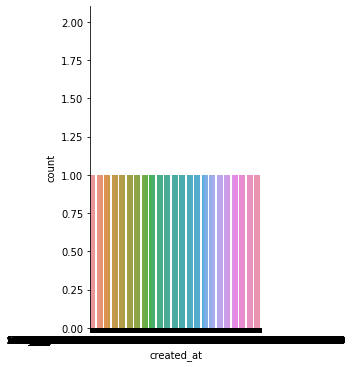

In [ ]:
#grafico 
import matplotlib.pyplot as plt
from datetime import datetime
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np

sns.factorplot('created_at', data=df, kind='count')





In [ ]:
#informações do dataframe
#df.info() 

# Número de linhas da coluna ‘Text’:
df.Text.count()

# Removendo os valores duplicados:
df.drop_duplicates(['Text'], inplace=True)

#https://minerandodados.com.br/analise-de-sentimentos-utilizando-dados-do-twitter/

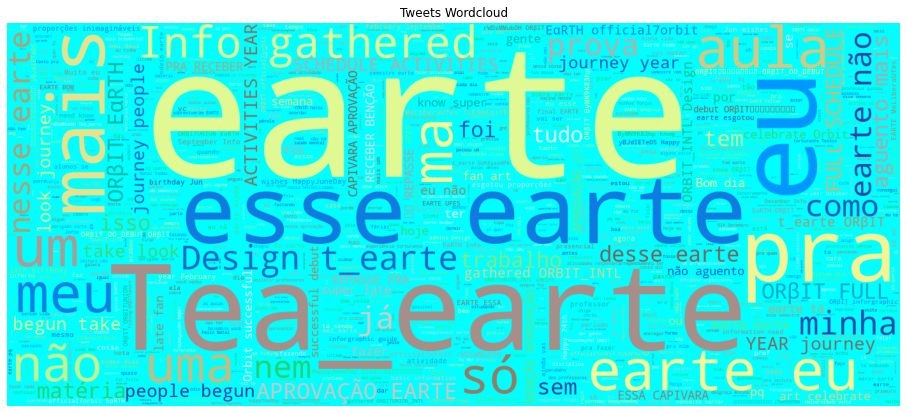

In [ ]:
from wordcloud import WordCloud, STOPWORDS

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import string
import json

import numpy as np 
import pandas as pd 
from time import time
import re
import string
import os
#import emoji
import collections

st_words = set(STOPWORDS)
#enhancing stopword by removing @mentions and shorthands
st_words.update(['que','de','da', 'para', 'https','CO','RT','na','ao','os', 'em','via','amp','place','new','ttot','best','great','top','ht','ysecrettravel','ysecrettravel_'])


wc = WordCloud(height=600,repeat=False,width=1400,max_words=1000,stopwords=st_words,colormap='terrain',background_color='Cyan',mode='RGBA').generate(' '.join(df['text'].dropna().astype(str)))
plt.figure(figsize = (16,16))
plt.imshow(wc)
plt.title('Tweets Wordcloud')
plt.axis('off')
plt.show()

#https://www.kaggle.com/overload10/twitter-dataset-eda referencia

In [ ]:
# Estatísticas básicas
# Verificar mínimos e máximos para garantir se estão dentro dos limites esperados
# Verificar intervalo de variação da medida
# Verificar possíveis outliers
df.describe()

# Verificar tipos de dados
df.dtypes


# Verificar nulos
df.info()


# Verificar nulos
pandas.options.mode.use_inf_as_na = True
df.isnull().sum()

#ref https://www.kaggle.com/educfrio/an-lise-explorat-ria-de-dados 
# plotando dados: https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            4998 non-null   int64  
 1   tweet_url                     4998 non-null   object 
 2   created_at                    4998 non-null   object 
 3   parsed_created_at             4998 non-null   object 
 4   user_screen_name              4998 non-null   object 
 5   text                          4998 non-null   object 
 6   tweet_type                    4998 non-null   object 
 7   coordinates                   0 non-null      float64
 8   hashtags                      536 non-null    object 
 9   media                         385 non-null    object 
 10  urls                          290 non-null    object 
 11  favorite_count                4998 non-null   int64  
 12  in_reply_to_screen_name       1255 non-null   object 
 13  in_

NameError: ignored

In [ ]:
#Let’s see if there are any null values present in our dataset:
df.isnull().sum()

id                                 0
tweet_url                          0
created_at                         0
parsed_created_at                  0
user_screen_name                   0
text                               0
tweet_type                         0
coordinates                     4998
hashtags                        4462
media                           4613
urls                            4708
favorite_count                     0
in_reply_to_screen_name         3743
in_reply_to_status_id           3750
in_reply_to_user_id             3743
lang                               0
place                           4910
possibly_sensitive              4329
retweet_count                      0
retweet_or_quote_id             3395
retweet_or_quote_screen_name    3395
retweet_or_quote_user_id        3395
source                             1
user_id                            0
user_created_at                    0
user_default_profile_image         0
user_description                 381
u

**## Analise de dados**



In [ ]:
for index,text in enumerate(df['text']):
  print('Tweet %d:\n'%(index+1),text)

A saída de streaming foi truncada nas últimas 5000 linhas.
 O que vc curte?

Eu curto falar mal do EARTE https://t.co/JTkpZJlgoN
Tweet 3058:
 eu tô quase trancando a faculdade já pois saturada demais do earte https://t.co/lDcg5DyxzW
Tweet 3059:
 Essa sou eu iludida acreditando que não vai ter EARTE ano que vem kkkkkkk pq aí no caso nunca vou ver essa menina
Tweet 3060:
 O desânimo que dá, quando recebo notificação de atividade no EARTE é algo descomunal.
Tweet 3061:
 incrível como até no earte o fim de semestre causa catástrofes acadêmicas 
essa semana consegui deixar matéria atrasada pela 1ª vez 🥰
Tweet 3062:
 Pô todo dia uma decepção nesse earte
Tweet 3063:
 @t_earte Cute 🤗
Tweet 3064:
 congratulations to our colleagues!!! @jecheverriao @FranciscaPerez_ @InvestigaUSJ #EARTE @_usj_ https://t.co/RLcwO8UXuO
Tweet 3065:
 Eu gastei todas as minhas forças estudando no EARTE por 2 meses... ainda falta 1 mês e eu não aguento mais, não tenho mais saúde pra isso, tem um turbilhão de coisas pra

In [ ]:
#teste sentimento 
#from textblob import TextBlob

#iterar imprimindo todos tweets
for i in df.Tweet_text:
    print(df.Tweet_text)


  
import pandas as pd 
from textblob import TextBlob
df=pd.read_csv(r'/content/sample_data/tweet_activity_metrics_TheCoolFanBoi_20181208_20190105_en.csv')


#comment_words=' '
#stopwords=set(STOPWORDS)
print('Tweet   |     Polarity     |     Subjectivity')
for val in df.Tweet_text:
    sentiments=TextBlob(val)
    print('---------------')
    print(val,end='')
    print(' ',end='')
    print(sentiments.polarity,end='')
    print(' |  ',end='')
    print(sentiments.subjectivity)

#Codigo com erro; Corrigir

AttributeError: ignored

In [ ]:
df.head()

,id,tweet_url,created_at,parsed_created_at,user_screen_name,text,tweet_type,coordinates,hashtags,media,urls,favorite_count,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,retweet_count,retweet_or_quote_id,retweet_or_quote_screen_name,retweet_or_quote_user_id,source,user_id,user_created_at,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified
0,1348123015066775554,https://twitter.com/b2Gr8/status/1348123015066...,Sun Jan 10 04:22:28 +0000 2021,2021-01-10 04:22:28+00:00,b2Gr8,@Tea_earte てぃさんおはようございますっ😆✨,reply,NaN,NaN,NaN,NaN,1,Tea_earte,1.348092e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,Twitter for iPhone,1264309021,Wed Mar 13 12:05:21 +0000 2013,False,声真似主さん好き！/サブ(@b_2G_r8),107653,710,488,7,NaN,ビゴリ,118678,NaN,NaN,False
1,1348125535495340033,https://twitter.com/b2Gr8/status/1348125535495...,Sun Jan 10 04:32:29 +0000 2021,2021-01-10 04:32:29+00:00,b2Gr8,@Tea_earte てぃさぁぁあんんんん！！！！！,reply,NaN,NaN,NaN,NaN,1,Tea_earte,1.348124e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,Twitter for iPhone,1264309021,Wed Mar 13 12:05:21 +0000 2013,False,声真似主さん好き！/サブ(@b_2G_r8),107653,710,488,7,NaN,ビゴリ,118678,NaN,NaN,False
2,1348145276914200576,https://twitter.com/jktaejoon/status/134814527...,Sun Jan 10 05:50:56 +0000 2021,2021-01-10 05:50:56+00:00,jktaejoon,GENTE TA PARCENDO UMA OBRA D EARTE UMA PINTURA...,original,NaN,NaN,https://pbs.twimg.com/media/ErWS-oBXAAI5bHj.jpg,NaN,0,NaN,NaN,NaN,pt,NaN,False,0,NaN,NaN,NaN,Twitter for Android,1295795277958467587,Tue Aug 18 18:50:55 +0000 2020,False,NaN,10924,2019,1992,18,1997,anne,30606,NaN,NaN,False
3,1348184655237844992,https://twitter.com/____stk1022/status/1348184...,Sun Jan 10 08:27:24 +0000 2021,2021-01-10 08:27:24+00:00,____stk1022,@Tea_earte てぃさんが発音よく言ってるのがしっかり脳内で再生できた（笑）,reply,NaN,NaN,NaN,NaN,0,Tea_earte,1.348182e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,Twitter for iPhone,3998131632,Sat Oct 24 03:48:13 +0000 2015,False,𝐓𝐞𝐚 𝐭𝐢𝐦𝐞 ∽ 𖠚ᐝ❤︎,35614,85,101,4,𝐋𝐞𝐯𝐢 𝐀𝐜𝐤𝐞𝐫𝐦𝐚𝐧,"サ ツ キ ,",9372,NaN,NaN,False
4,1348187077905563649,https://twitter.com/____stk1022/status/1348187...,Sun Jan 10 08:37:02 +0000 2021,2021-01-10 08:37:02+00:00,____stk1022,@Tea_earte 喜んでもっと喜んで！！！\r\n闘いで負けても発音の良さでは勝てるとい...,reply,NaN,NaN,NaN,NaN,0,Tea_earte,1.348185e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,Twitter for iPhone,3998131632,Sat Oct 24 03:48:13 +0000 2015,False,𝐓𝐞𝐚 𝐭𝐢𝐦𝐞 ∽ 𖠚ᐝ❤︎,35614,85,101,4,𝐋𝐞𝐯𝐢 𝐀𝐜𝐤𝐞𝐫𝐦𝐚𝐧,"サ ツ キ ,",9372,NaN,NaN,False


In [ ]:
#lista de 20 top - PALAVRAS

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words=['earte','de','que','do', 'co','https','eu','no', 'pra','com', 'da', 'me'])
count_matrix = cv.fit_transform(df.text)

word_count = pd.DataFrame(cv.get_feature_names(), columns=["TOP_WORD"])
word_count["count"] = count_matrix.sum(axis = 0).tolist()[0]
word_count = word_count.sort_values("count", ascending = False).reset_index(drop = True)

word_count[:50]
#FUNCIONA 
#REFERENCIA: https://github.com/vhnegrisoli/analise-exploratoria-dados-python/blob/master/01%20-%20MongoDB%20e%20NoSQL%20com%20Python%2C%20Pandas%2C%20Scikit%20Learn%20e%20API%20Twitter.ipynb




,TOP_WORD,count
0,não,803
1,tea_earte,496
2,mais,493
3,2020,485
4,em,465
5,um,449
6,orβit,441
7,esse,411
8,uma,379
9,se,338


In [ ]:

# calculate number of characters in a tweet and save as new column
df['tweet_length']  = np.array([len(tweet) for tweet in df['text']])

print('Average number of characters per tweet:', df['tweet_length'].mean())
print('Average number of characters per reply:', df['tweet_length'][df['in_reply_to_status_id'] != 0].mean())
print('Average number of characters per retweet:', df['tweet_length'][df['retweeted_status_id'] != 0].mean())
print('Average number of characters per mention:', df['tweet_length'][df['mention_to_user_id'] != 0].mean())

#corrigir erro  retweet e mention
#https://www.kaggle.com/leonardoassis/portuguese-tweets-nltk-and-sklearn

Average number of characters per tweet: 89.96458583433373
Average number of characters per reply: 89.96458583433373


KeyError: ignored

text data analysis

In [ ]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    # remove special characters, links from tweets
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    # predict the sentiment of a tweet using textblob
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

# create a new column with the result of the sentiment analysis
df['sentiment'] = np.array([analize_sentiment(tweet) for tweet in df['text']])

# construct lists with classified tweets
pos_tweets = [ tweet for index, tweet in enumerate(df['text']) if df['sentiment'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(df['text']) if df['sentiment'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(df['text']) if df['sentiment'][index] < 0]

# print percentages
print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(df['text'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(df['text'])))
print("Percentage of negative tweets: {}%".format(len(neg_tweets)*100/len(df['text'])))

#verificar analise dos percentuais 

Percentage of positive tweets: 7.883153261304522%
Percentage of neutral tweets: 91.09643857543017%
Percentage of negative tweets: 1.0204081632653061%


time series analysis

In [ ]:
df.head()

,id,tweet_url,created_at,parsed_created_at,user_screen_name,text,tweet_type,coordinates,hashtags,media,urls,favorite_count,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,retweet_count,retweet_or_quote_id,retweet_or_quote_screen_name,retweet_or_quote_user_id,source,user_id,user_created_at,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified,tweet_length,sentiment
0,1348123015066775554,https://twitter.com/b2Gr8/status/1348123015066...,Sun Jan 10 04:22:28 +0000 2021,2021-01-10 04:22:28+00:00,b2Gr8,@Tea_earte てぃさんおはようございますっ😆✨,reply,NaN,NaN,NaN,NaN,1,Tea_earte,1.348092e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,Twitter for iPhone,1264309021,Wed Mar 13 12:05:21 +0000 2013,False,声真似主さん好き！/サブ(@b_2G_r8),107653,710,488,7,NaN,ビゴリ,118678,NaN,NaN,False,27,0
1,1348125535495340033,https://twitter.com/b2Gr8/status/1348125535495...,Sun Jan 10 04:32:29 +0000 2021,2021-01-10 04:32:29+00:00,b2Gr8,@Tea_earte てぃさぁぁあんんんん！！！！！,reply,NaN,NaN,NaN,NaN,1,Tea_earte,1.348124e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,Twitter for iPhone,1264309021,Wed Mar 13 12:05:21 +0000 2013,False,声真似主さん好き！/サブ(@b_2G_r8),107653,710,488,7,NaN,ビゴリ,118678,NaN,NaN,False,26,0
2,1348145276914200576,https://twitter.com/jktaejoon/status/134814527...,Sun Jan 10 05:50:56 +0000 2021,2021-01-10 05:50:56+00:00,jktaejoon,GENTE TA PARCENDO UMA OBRA D EARTE UMA PINTURA...,original,NaN,NaN,https://pbs.twimg.com/media/ErWS-oBXAAI5bHj.jpg,NaN,0,NaN,NaN,NaN,pt,NaN,False,0,NaN,NaN,NaN,Twitter for Android,1295795277958467587,Tue Aug 18 18:50:55 +0000 2020,False,NaN,10924,2019,1992,18,1997,anne,30606,NaN,NaN,False,79,0
3,1348184655237844992,https://twitter.com/____stk1022/status/1348184...,Sun Jan 10 08:27:24 +0000 2021,2021-01-10 08:27:24+00:00,____stk1022,@Tea_earte てぃさんが発音よく言ってるのがしっかり脳内で再生できた（笑）,reply,NaN,NaN,NaN,NaN,0,Tea_earte,1.348182e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,Twitter for iPhone,3998131632,Sat Oct 24 03:48:13 +0000 2015,False,𝐓𝐞𝐚 𝐭𝐢𝐦𝐞 ∽ 𖠚ᐝ❤︎,35614,85,101,4,𝐋𝐞𝐯𝐢 𝐀𝐜𝐤𝐞𝐫𝐦𝐚𝐧,"サ ツ キ ,",9372,NaN,NaN,False,41,0
4,1348187077905563649,https://twitter.com/____stk1022/status/1348187...,Sun Jan 10 08:37:02 +0000 2021,2021-01-10 08:37:02+00:00,____stk1022,@Tea_earte 喜んでもっと喜んで！！！\r\n闘いで負けても発音の良さでは勝てるとい...,reply,NaN,NaN,NaN,NaN,0,Tea_earte,1.348185e+18,1.302152e+18,ja,NaN,NaN,0,NaN,NaN,NaN,Twitter for iPhone,3998131632,Sat Oct 24 03:48:13 +0000 2015,False,𝐓𝐞𝐚 𝐭𝐢𝐦𝐞 ∽ 𖠚ᐝ❤︎,35614,85,101,4,𝐋𝐞𝐯𝐢 𝐀𝐜𝐤𝐞𝐫𝐦𝐚𝐧,"サ ツ キ ,",9372,NaN,NaN,False,51,0


In [ ]:
df_time = df.copy()

# set the timestamp column as the index and delete the column
df_time.index = df_time['created_at']
del df_time['created_at']

df_time.head()

In [ ]:
df.head()

In [ ]:
print('Total tweets in 2020:', df_time['2020']['created_at'].count())
#print('Total replies in 2020:', (df_time!=0)['2020']['in_reply_to_status_id'].sum()) # zeros need to be excluded

KeyError: ignored

In [ ]:
from textblob import TextBlob

# perform sentiment analysis on each tweet
# -1 < polarity < 1 (negativity vs positivity (sentiment))
# 0 < subjectivity < 1 (factual vs opinion)
for text in df:
    print(df.text)
    analysis = TextBlob(df.text)
    print(analysis.sentiment)
    print("----------")

#    Deu erro. retomar https://ugoproto.github.io/ugo_py_doc/


0       A Administração Central da Ufes comunica que a...
1       A Administração Central da Ufes comunica que a...
2       eu n vou formar nunca mais c esse earte puta q...
3       Ufes comunica mais um semestre com o Earte htt...
4       A Administração Central da Ufes comunica que a...
                              ...                        
4993    regra de ouro do earte = fazer as atividades a...
4994                     deus está triste com tanto earte
4995                                 Earte só tem pérolas
4996                                 Earte só tem pérolas
4997    Dês do começo do earte hj foi o meu dia mais i...
Name: text, Length: 4998, dtype: object


TypeError: ignored

In [ ]:
# Frequecy word
#Create List of Lower Case Words from Tweets

from collections import Counter

for item in df[text]:
    c = Counter(item)
    print(c.most_common()[:10]) # top 10
    print()




NameError: ignored

In [ ]:
from collections import Counter

top=Counter([item for sublist in df['text'] for item in sublist])
df=pd.DataFrame(top.most_common(20))
df=df.iloc[1:,:]
df.columns=['Common_words','count']
df.style.background_gradient(cmap='OrRd')

,Common_words,count
1,e,38861
2,a,35424
3,o,27254
4,r,20401
5,t,19712
6,s,19319
7,i,15884
8,n,14076
9,d,12658
10,u,11655


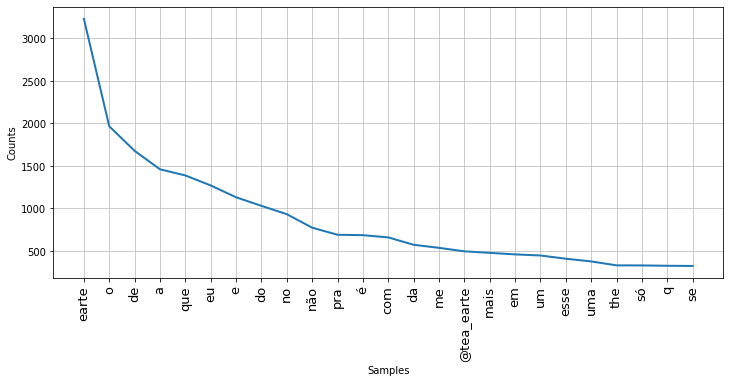

Text(0.5, 0, 'Word Rank')

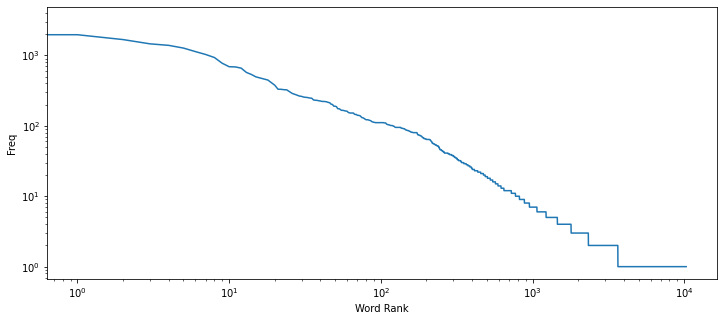

In [ ]:
# most common words in twitter dataset

# Machine Learning imports
import nltk
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
#from nltk.stem.wordnet import WordNetLemmatizerLoad #training dataset to Pandas and preview the top rows.
import matplotlib.pyplot as plt

all_words = []
for line in list(df['text']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
# plot word frequency distribution of first few words
plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)
# log-log of all words 
word_counts = sorted(Counter(all_words).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

# Está funcionando. Falta inserir as stopWord
# https://towardsdatascience.com/the-real-world-as-seen-on-twitter-sentiment-analysis-part-one-5ac2d06b63fb

In [ ]:
from collections import Counter

for item in df['text']:
    c = Counter(item)
    print (c.most_common()[:10]) # top 10, "\n")

NameError: ignored

In [ ]:
# 10 most repeated tweets
df.groupby(['text']).size().reset_index(name='counts')\
  .sort_values('counts', ascending=False).head(10)
#https://ourcodingclub.github.io/tutorials/topic-modelling-python/

KeyError: ignored

In [ ]:
# Get the data
import matplotlib.pyplot as plt

tweet_count = len(df)
favorite_count = df['favorite_count'].sum()
retweet_count = df['retweet_count'].sum()

# Print it out
print('Number of tweets: ' + str(tweet_count))
print('Total number of likes: ' + str(favorite_count))
print('Total number of retweets: '+ str(retweet_count))
# Draw a nice plot of the likes and retweets
df.plot.bar(subplots=True, figsize=(10,6),y=
   ['favorite_count','retweet_count'])
plt.show()

NameError: ignored

In [ ]:
from collections import Counter

top=Counter([item for sublist in df['text'] for item in sublist])
df=pd.DataFrame(top.most_common(20))
df=df.iloc[1:,:]
df.columns=['Common_words','count']
df.style.background_gradient(cmap='OrRd')

,Common_words,count
1,e,38861
2,a,35424
3,o,27254
4,r,20401
5,t,19712
6,s,19319
7,i,15884
8,n,14076
9,d,12658
10,u,11655


In [ ]:
# Stopwords em português:

import nltk
nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('portuguese')

stopwords[:10]
[u'de', u'a', u'o', u'que', u'e', u'do', u'da', u'em', u'um', u'para']

len(stopwords)
203

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


203

In [ ]:
# Inspecting the distribution of numerical values
df.describe()

,id,coordinates,favorite_count,in_reply_to_status_id,in_reply_to_user_id,retweet_count,retweet_or_quote_id,retweet_or_quote_user_id,user_id,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_statuses_count,user_time_zone
count,4.998000e+03,0.0,4998.000000,1.248000e+03,1.255000e+03,4998.000000,1.603000e+03,1.603000e+03,4.998000e+03,4998.000000,4.998000e+03,4998.000000,4998.000000,4.998000e+03,0.0
mean,1.331158e+18,NaN,39.401561,1.336420e+18,8.940547e+17,14.734294,1.329740e+18,5.284473e+17,5.728672e+17,26019.347539,1.867486e+04,461.492197,32.417167,2.276082e+04,NaN
std,9.537462e+15,NaN,95.554256,1.027323e+16,5.380653e+17,41.075401,1.033860e+16,5.754151e+17,5.395033e+17,34814.715111,6.018492e+05,693.456978,927.060666,4.339745e+04,NaN
min,1.314772e+18,NaN,0.000000,1.314919e+18,1.435412e+07,0.000000,1.272075e+18,8.802752e+06,1.981091e+06,0.000000,0.000000e+00,0.000000,0.000000,4.000000e+00,NaN
25%,1.322233e+18,NaN,0.000000,1.327953e+18,3.489445e+17,0.000000,1.321229e+18,1.718442e+08,1.264309e+09,5587.000000,1.220000e+02,159.000000,0.000000,3.915000e+03,NaN
50%,1.331392e+18,NaN,2.000000,1.339261e+18,1.195865e+18,0.000000,1.330527e+18,3.903150e+09,7.540328e+17,14203.000000,2.730000e+02,295.000000,0.000000,9.677000e+03,NaN
75%,1.337527e+18,NaN,9.000000,1.345233e+18,1.302152e+18,2.000000,1.336112e+18,1.227751e+18,1.093070e+18,33549.500000,6.037500e+02,522.000000,2.000000,2.541600e+04,NaN
max,1.349868e+18,NaN,663.000000,1.349767e+18,1.344928e+18,326.000000,1.349862e+18,1.331477e+18,1.349127e+18,350675.000000,2.117059e+07,10759.000000,32195.000000,1.317794e+06,NaN


In [ ]:
# Generating Word Frequency
#Let's first generate a frequency table of all the words present in all the tweets combined.

def gen_freq(text):
    #Will store the list of words
    word_list = []

    #Loop over all the tweets and extract words into word_list
    for tw_words in text.split():
        word_list.extend(tw_words)

    #Create word frequencies using word_list
    word_freq = pd.Series(word_list).value_counts()

    #Print top 20 words
    word_freq[:20]
    
    return word_freq

gen_freq(text.str)
#https://github.com/shivamsingh96/Natural_Language_Processing/blob/master/Exploring%20Text%20Data.ipynb


NameError: ignored

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Instanciando o objeto
vectorizer = TfidfVectorizer()
#construindo o vetorizador dos dados
vectorizer.fit(df['text']) 

print(vectorizer.vocabulary_)

print(vectorizer.idf_)



KeyError: ignored

**Codigos que poderão ser implementados para melhorar esta analise ou futuras**

nRowsRead = 1000 # specify 'None' if want to read whole file
# Tweets.csv has 14640 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('../input/Tweets.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'Tweets.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

## importar dataset com encoding 
full_df = pd.read_csv('../input/sentiment140/training.1600000.processed.noemoticon.csv', header = None, names = columns,  encoding='latin-1')

##https://www.kaggle.com/parthsharma5795/comprehensive-twitter-airline-sentiment-analysis 
new_df=df[df['airline_sentiment']=='negative']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


f.rename(columns={'tfr': 'TFR'}) #renomear coluna

### Referências consultadas

#https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/calculate-tweet-word-frequencies-in-python/
#https://necromuralist.github.io/Neurotic-Networking/posts/nlp/twitter-word-frequencies/
#https://marcobonzanini.com/2015/03/17/mining-twitter-data-with-python-part-3-term-frequencies/
#https://advertools.readthedocs.io/en/master/advertools.word_frequency.html
#https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/
#https://minerandodados.com.br/analise-de-sentimentos-twitter-como-fazer/#base-dados-scripts https://www.oreilly.com/library/view/mining-the-social/9781491973547/ch01.html
https://dev.to/mchdax/coletando-dados-do-twitter-com-python-1c7k
https://www.kaggle.com/amar09/sentiment-analysis-on-scrapped-tweets  LER